In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('survey 605.csv')

In [22]:
data['How often do you track fitness data using wearable?'] = data[
    'How often do you track fitness data using wearable?'].replace(
{
    'Every day' : '5 or more times a week',
    'Once a week' : '1-2 times a week',
    'Every other day' : '3-4 times a week',
    'Once a month' : 'Less than once a week',
    'Rarely' : 'Less than once a week'
})

data['Has the fitness wearable helped you stay motivated to exercise?'] = data[
    'Has the fitness wearable helped you stay motivated to exercise?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

data['Do you think that the fitness wearable has made exercising more enjoyable?'] = data[
    'Do you think that the fitness wearable has made exercising more enjoyable?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

data['How engaged do you feel with your fitness wearable?'] = data[
    'How engaged do you feel with your fitness wearable?'].replace(
{
    'Very engaged' : 5,
    'Somewhat engaged' : 4,
    'Neutral' : 3,
    'Not very engaged' : 2,
})

data['Has the fitness wearable helped you stay motivated to exercise?'] = data[
    'Has the fitness wearable helped you stay motivated to exercise?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

data['Does using a fitness wearable make you feel more connected to the fitness community?'] = data[
    'Does using a fitness wearable make you feel more connected to the fitness community?'].replace(
{
    'Strongly agree' : 5,
    'Agree' : 4,
    'Neutral' : 3,
    'Disagree' : 2,
    'Strongly disagree' : 1
})

exer_freq = data['How often do you exercise in a week?'].value_counts()
usage_freq = data['How often do you track fitness data using wearable?'].value_counts()

print('Exercise freq')
print(exer_freq)
print('\n')
print('Usage freq')
print(usage_freq)

Exercise freq
3-4 times a week          9
1-2 times a week          8
Less than once a week     7
5 or more times a week    6
Name: How often do you exercise in a week?, dtype: int64


Usage freq
5 or more times a week    9
1-2 times a week          8
3-4 times a week          8
Less than once a week     5
Name: How often do you track fitness data using wearable?, dtype: int64


In [23]:
usage = set()
for x in data['How often do you track fitness data using wearable?']:
    if x not in usage:
        usage.add(x)

In [24]:
usage_segment = {}
for x in usage:
    usage_segment[x] = data[data['How often do you track fitness data using wearable?'] == x]

In [25]:
def motivation(x):
    all_motiv = round(np.average(data['Has the fitness wearable helped you stay motivated to exercise?']), 2)
    instance = usage_segment[x]
    instance_motiv = round(np.average(instance['Has the fitness wearable helped you stay motivated to exercise?']), 2)
    diff_motiv = round(instance_motiv - all_motiv, 2)
    return instance_motiv, diff_motiv

def enjoyable(x):
    all_enjoy = round(np.average(data['Do you think that the fitness wearable has made exercising more enjoyable?']), 2)
    instance = usage_segment[x]
    instance_enjoy = round(np.average(instance['Do you think that the fitness wearable has made exercising more enjoyable?']), 2)
    diff_enjoy = round(instance_enjoy - all_enjoy, 2)
    return instance_enjoy, diff_enjoy

def engaged(x):
    all_eng = round(np.average(data['How engaged do you feel with your fitness wearable?']), 2)
    instance = usage_segment[x]
    instance_eng = round(np.average(instance['How engaged do you feel with your fitness wearable?']), 2)
    diff_eng = round(instance_eng - all_eng, 2)
    return instance_eng, diff_eng

def connected(x):
    all_con = round(np.average(data['Does using a fitness wearable make you feel more connected to the fitness community?']), 2)
    instance = usage_segment[x]
    instance_con = round(np.average(instance['Does using a fitness wearable make you feel more connected to the fitness community?']), 2)
    diff_con = round(instance_con - all_con, 2)
    return instance_con, diff_con

In [75]:
print('Attribute differences from total_average')
cols = ['Usage', 'Motivating?', 'Enjoyable?', 'Engaging?', 'Affiliative?']
rows = []
for x in usage_segment:
    inst = []
    inst.append(x)
    inst.append(motivation(x)[1])
    inst.append(enjoyable(x)[1])
    inst.append(engaged(x)[1])
    inst.append(connected(x)[1])
    rows.append(inst)

rows[2], rows[1] = rows[1], rows[2]
    
#print(rows)
summ_df = pd.DataFrame(rows, columns=cols)
print(summ_df)

Attribute differences from total_average
                    Usage  Motivating?  Enjoyable?  Engaging?  Affiliative?
0   Less than once a week        -0.07        0.03      -0.57          0.30
1        1-2 times a week        -0.52       -0.29      -0.35         -0.35
2        3-4 times a week        -0.15       -0.17       0.15         -0.22
3  5 or more times a week         0.62        0.39       0.47          0.34


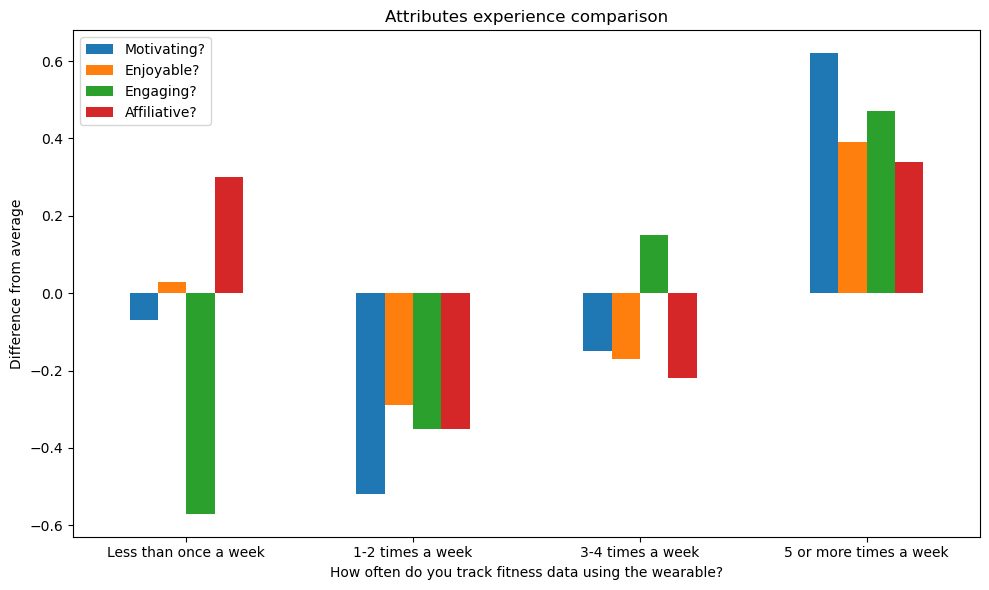

In [76]:
summ_df.set_index('Usage').plot(kind='bar', figsize=(10, 6))
plt.title('Attributes experience comparison')
plt.xlabel('How often do you track fitness data using the wearable?')
plt.ylabel('Difference from average')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
age_set = set()
for x in data['What is your age?']:
    if x not in age_set:
        age_set.add(x)

print(age_set)

{'45-54', '18-24', '25-34', 'Under 18', '35-44', '55-64'}


In [73]:
cols = []
for x in age_set:
    cols.append(x)
    
cols = [cols[3], cols[1], cols[2], cols[4], cols[0], cols[-1]]
print(cols)

rows2 = []
for y in usage:
    inst = []
    inst.append(y)
    for z in age_set:
        sub = data[data['What is your age?'] == z]
        count = (sub['How often do you track fitness data using wearable?']==y).sum()
        inst.append(count)
    inst = [inst[0], inst[4], inst[2], inst[3], inst[5], inst[1], inst[-1]]
    rows2.append(inst)

    
rows2[2][0], rows2[1][0] = rows2[1][0], rows2[2][0]
print(rows)

age_usage_df = pd.DataFrame(rows2, columns = ['Frequency']+cols)
print(age_usage_df)

['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64']
[['Less than once a week', -0.07, 0.03, -0.57, 0.3], ['3-4 times a week', -0.15, -0.17, 0.15, -0.22], ['1-2 times a week', -0.52, -0.29, -0.35, -0.35], ['5 or more times a week', 0.62, 0.39, 0.47, 0.34]]
                Frequency  Under 18  18-24  25-34  35-44  45-54  55-64
0   Less than once a week         0      2      1      1      1      0
1        1-2 times a week         2      2      1      1      1      1
2        3-4 times a week         2      1      3      0      1      1
3  5 or more times a week         1      5      1      2      0      0


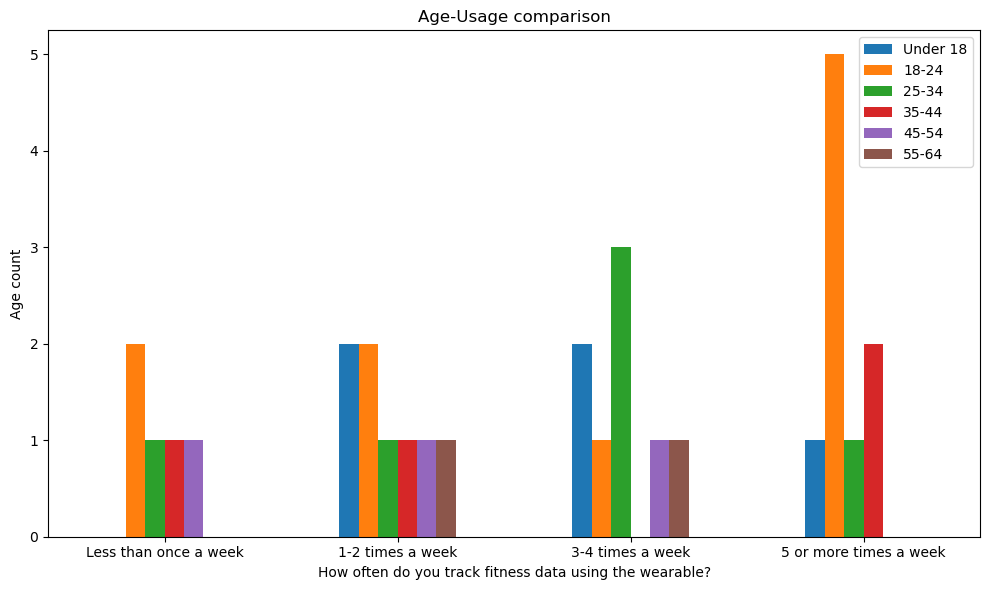

In [74]:
age_usage_df.set_index('Frequency').plot(kind='bar', figsize=(10, 6))
plt.title('Age-Usage comparison')
plt.xlabel('How often do you track fitness data using the wearable?')
plt.ylabel('Age count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [81]:
gen_set = set()
for x in data['What is your gender?']:
    if x not in gen_set:
        gen_set.add(x)

print(gen_set)

{'Male', 'Female', 'Prefer not to say'}


In [93]:
gen_col = []
for x in gen_set:
    gen_col.append(x)

gen_rows=[]
for x in usage:
    inst3 = []
    inst3.append(x)
    for y in gen_col:
        sub = data[data['What is your gender?'] == y]
        count = (sub['How often do you track fitness data using wearable?']==x).sum()
        inst3.append(count)
    gen_rows.append(inst3)

gen_rows[1], gen_rows[2] = gen_rows[2], gen_rows[1]

[['Less than once a week', 1, 4, 0], ['1-2 times a week', 3, 4, 1], ['3-4 times a week', 4, 3, 1], ['5 or more times a week', 5, 4, 0]]


In [96]:
gen_df = pd.DataFrame(gen_rows, columns = ['Freq'] +gen_col)
print(gen_df)

                     Freq  Male  Female  Prefer not to say
0   Less than once a week     1       4                  0
1        1-2 times a week     3       4                  1
2        3-4 times a week     4       3                  1
3  5 or more times a week     5       4                  0


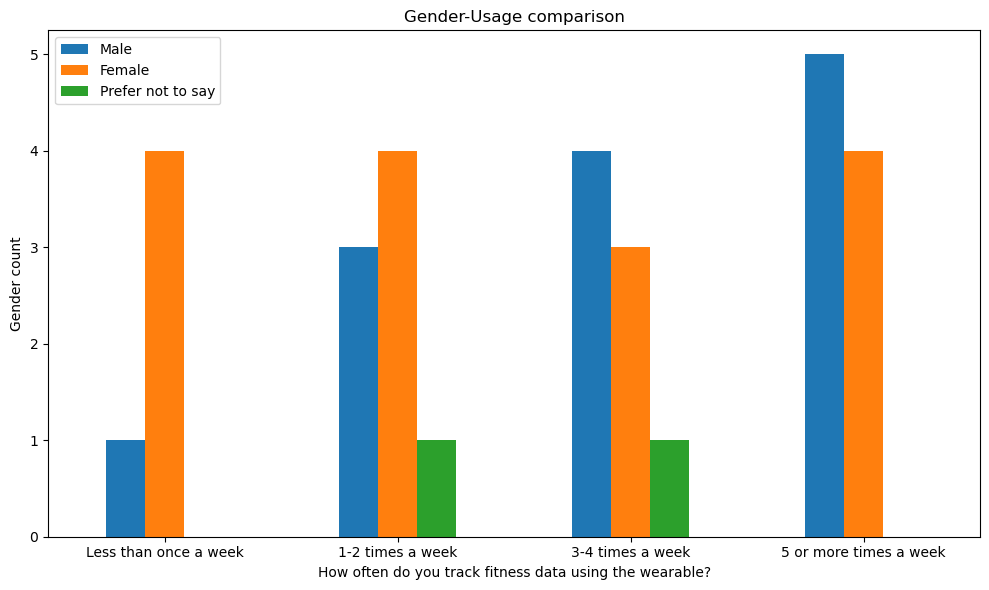

In [97]:
gen_df.set_index('Freq').plot(kind='bar', figsize=(10, 6))
plt.title('Gender-Usage comparison')
plt.xlabel('How often do you track fitness data using the wearable?')
plt.ylabel('Gender count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [99]:
print(data['What is your age?'].value_counts())

18-24       10
25-34        6
Under 18     5
35-44        4
45-54        3
55-64        2
Name: What is your age?, dtype: int64
